In [37]:
import copy, math
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [4]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X type: {type(X_train)}")
print(X_train)
print(f"y Shape: {y_train.shape}, y type: {type(y_train)}")
print(y_train)


X Shape: (3, 4), X type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y type: <class 'numpy.ndarray'>
[460 232 178]


In [5]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


#### Single Prediction element by element

In [8]:
def predict_single_loop(x, w, b):
    """ 
    single predict using linear regression 

    Args:
        x (ndarray): Shape (n,) example with multiple features
        w (ndarray): Shape (n,) model parameters
        b (scaler): model parameter

    Returns:
        p (scalar): prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [9]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

x_vec shape (4,), x_vec value: [2104    5    1   45]


In [10]:
# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

f_wb shape (), prediction: 459.9999976194083


#### Single Prediction, vector

In [12]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x,w) + b
    return p

In [13]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


### Compute cost with Multiple Variables


In [22]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return cost

In [23]:
cost = compute_cost( X_train, y_train, w_init, b_init)
print(f"Cost at optimal: {cost}")

Cost at optimal: 1.5578904428966628e-12


### Gradient Descent with Multiple Variables

In [27]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regrewssion
    Args:
        X (ndarray) (m,n): Data , m examples with n features
        y (ndarray) (m,) : target values
        w (ndarray) (n,) : model parameters
        b (scaler)       : model parameter

    Return:
        dj_dw (ndarray) (n,): the gradient of the cost w.r.t the parameters w
        dj_db (scaler)      : the gradient of the cost w.r.t the parameter b
    """

    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i],w)+b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
    dj_db = dj_db + err
    dj_db = dj_db/m
    dj_dw = dj_dw/m

    return dj_db, dj_dw

        
        

In [28]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f"dj_db at initial w,b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: {tmp_dj_dw}")

dj_db at initial w,b: -3.368639530284175e-07
dj_dw at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


### Gradient Descent with Multiple Variables


In [32]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        #Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)

        #Update the parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        #Save the cost at each iterations
        if i<100000:    #Prevents resoure exhaustion
            J_history.append(cost_function(X, y , w, b))

        #Prints cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 :
            print(f"Iteration {i:4d}: cost {J_history[-1]:8.2f}")

    return w, b, J_history

        
        

In [33]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.0
#some gradient descent settings
iterations = 1000
alpha = 5.0e-7
#run gradeint descent
w_final, b_final , J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                             compute_cost, compute_gradient, 
                                             alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final}")


    

Iteration    0: cost  2529.46
Iteration  100: cost   695.99
Iteration  200: cost   694.92
Iteration  300: cost   693.86
Iteration  400: cost   692.82
Iteration  500: cost   691.77
Iteration  600: cost   690.74
Iteration  700: cost   689.72
Iteration  800: cost   688.71
Iteration  900: cost   687.70
b,w found by gradient descent: 0.00,[ 0.2   0.   -0.01 -0.07]


In [35]:
m, _ = X_train.shape
for i in range(m):
    print(f"Prediction: {np.dot(X_train[i],w_final) + b_final : 0.2f}, target value : {y_train[i]}")

Prediction:  426.18, target value : 460
Prediction:  286.17, target value : 232
Prediction:  171.47, target value : 178


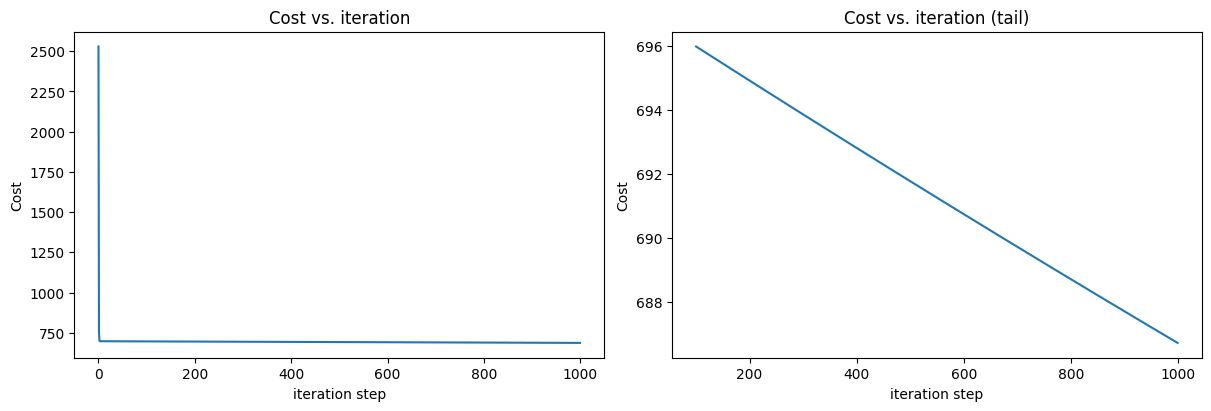

In [38]:


# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

